In [155]:
library(AppliedPredictiveModeling)
data(FuelEconomy)

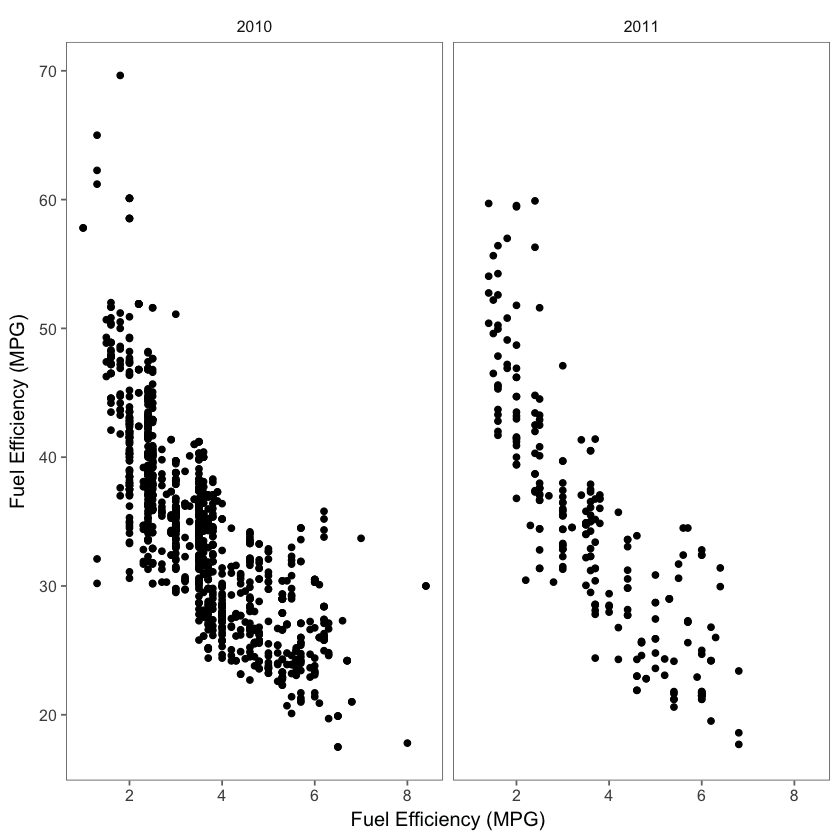

In [156]:
library(ggplot2)
library(scales)
library(ggthemes)

data2010 <- cars2010[,c('EngDispl','FE')]
data2010$Year <- 2010
data2011 <- cars2011[,c('EngDispl','FE')]
data2011$Year <- 2011

data <- rbind(data2010,data2011)

library(ggplot2)
library(ggthemes)
library(scales)

ggplot(data = data,aes(x=EngDispl,y=FE)) + geom_point() + facet_grid(.~Year) + theme_few() +
    labs(x = "Fuel Efficiency (MPG)",y = "Fuel Efficiency (MPG)")

In [157]:
trn <- data2010
vld <- data2011

library(caret)
fit_linear <- train(FE~EngDispl,data=trn,method = 'lm',trControl = trainControl(method='cv'))
summary(fit_linear)

library(Metrics)
rmse(actual = trn$FE,predicted =fit_linear$finalModel$fitted.values )


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.486  -3.192  -0.365   2.671  27.215 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  50.5632     0.3985  126.89   <2e-16 ***
EngDispl     -4.5209     0.1065  -42.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.624 on 1105 degrees of freedom
Multiple R-squared:   0.62,	Adjusted R-squared:  0.6196 
F-statistic:  1803 on 1 and 1105 DF,  p-value: < 2.2e-16


[1] 4.620076

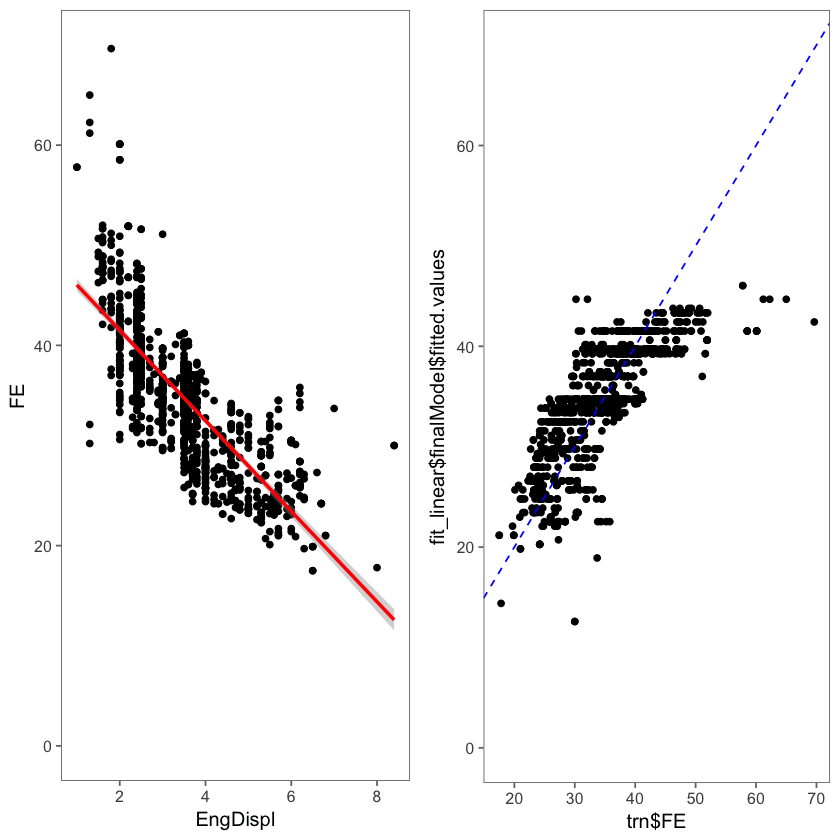

In [158]:
p1 <- ggplot(trn,aes(EngDispl,FE)) + geom_point() + scale_y_continuous(limits = c(0,70)) + theme_few() +
    geom_smooth(aes(EngDispl,FE),method='lm',colour = "red")
p2 <- ggplot(data=trn,aes(x=trn$FE,y=fit_linear$finalModel$fitted.values)) + geom_point()  + geom_abline(linetype="dashed",colour = "blue") + 
    scale_y_continuous(limits = c(0,70)) + theme_few() 
library(gridExtra)
grid.arrange(p1, p2, ncol=2)

In [159]:
#iintroducing some nonlinearity 
fit_quadratic <- train(FE~EngDispl+I(EngDispl^2),data=trn,method = 'lm',trControl = trainControl(method='cv'))
summary(fit_quadratic)

rmse(actual = trn$FE,predicted =fit_quadratic$finalModel$fitted.values )


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.1862  -2.5977  -0.3028   2.6089  24.7385 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      63.23343    0.94761   66.73   <2e-16 ***
EngDispl        -11.86738    0.51627  -22.99   <2e-16 ***
`I(EngDispl^2)`   0.93510    0.06453   14.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.241 on 1104 degrees of freedom
Multiple R-squared:  0.6807,	Adjusted R-squared:  0.6801 
F-statistic:  1177 on 2 and 1104 DF,  p-value: < 2.2e-16


[1] 4.234826

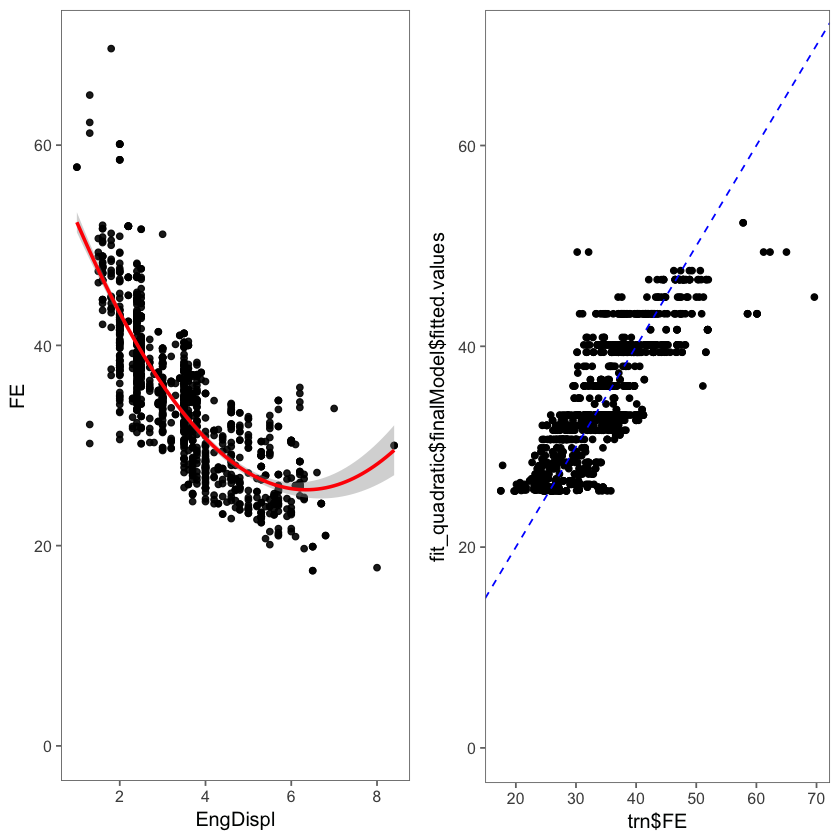

In [160]:
p3 <- ggplot(trn,aes(EngDispl,FE)) + geom_point(alpha=.9) + scale_y_continuous(limits = c(0,70)) + theme_few() +
    geom_smooth(aes(EngDispl,FE),method='lm', formula=y~x+I(x^2),colour = "red")

p4 <- ggplot(data=trn,aes(x=trn$FE,y=fit_quadratic$finalModel$fitted.values)) + geom_point()  + geom_abline(linetype="dashed",colour = "blue") + 
    scale_y_continuous(limits = c(0,70)) +
    theme_few()

grid.arrange(p3, p4, ncol=2)

Multivariate Adaptive Regression Spline 

1107 samples
   1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 996, 996, 997, 995, 997, 996, ... 
Resampling results across tuning parameters:

  nprune  RMSE      Rsquared   MAE     
  2       4.302964  0.6741227  3.324325
  3       4.253232  0.6820937  3.272757
  4       4.209220  0.6888198  3.204315
  5       4.212119  0.6884586  3.203663

Tuning parameter 'degree' was held constant at a value of 1
RMSE was used to select the optimal model using  the smallest value.
The final values used for the model were nprune = 4 and degree = 1.

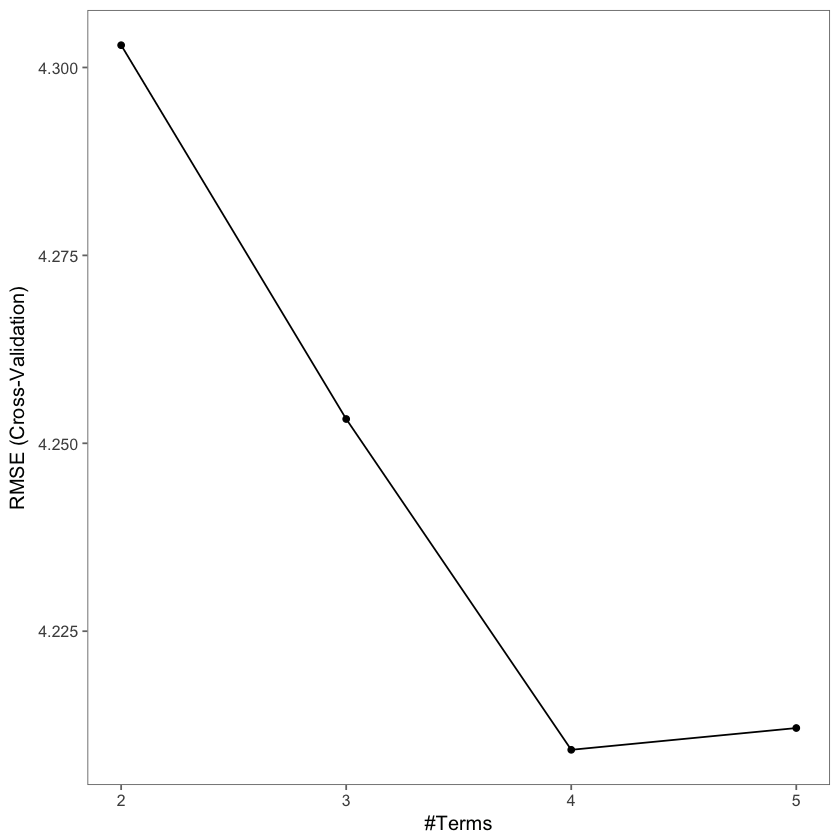

In [161]:
#MARS
library(earth)
#set.seed(825)
fit_MARS <- train(FE~EngDispl,data = trn, method = "earth", tuneLength = 15,trControl = trainControl(method='cv'))
fit_MARS
ggplot(fit_MARS) + theme_few()

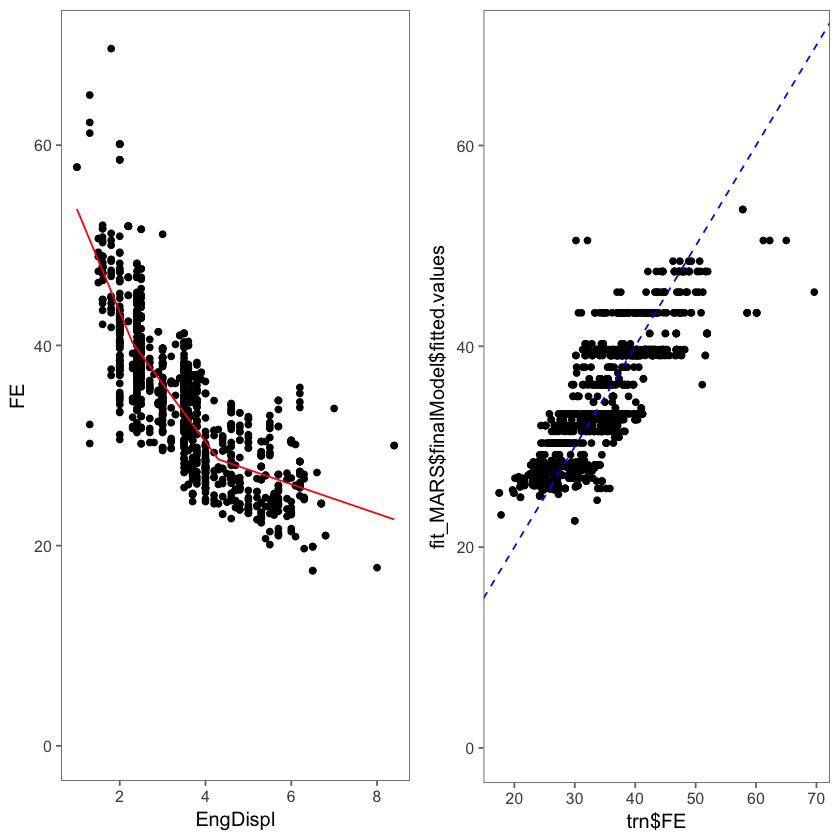

In [162]:
p5 <- ggplot(trn,aes(EngDispl,FE)) + geom_point() + scale_y_continuous(limits = c(0,70)) + theme_few() +
    geom_line(aes(EngDispl,fit_MARS$finalModel$fitted.values),colour="red")

p6 <- ggplot(data=trn,aes(x=trn$FE,y=fit_MARS$finalModel$fitted.values)) + geom_point()  + geom_abline(linetype="dashed",colour = "blue") + 
    scale_y_continuous(limits = c(0,70)) +
    theme_few()

grid.arrange(p5, p6, ncol=2)

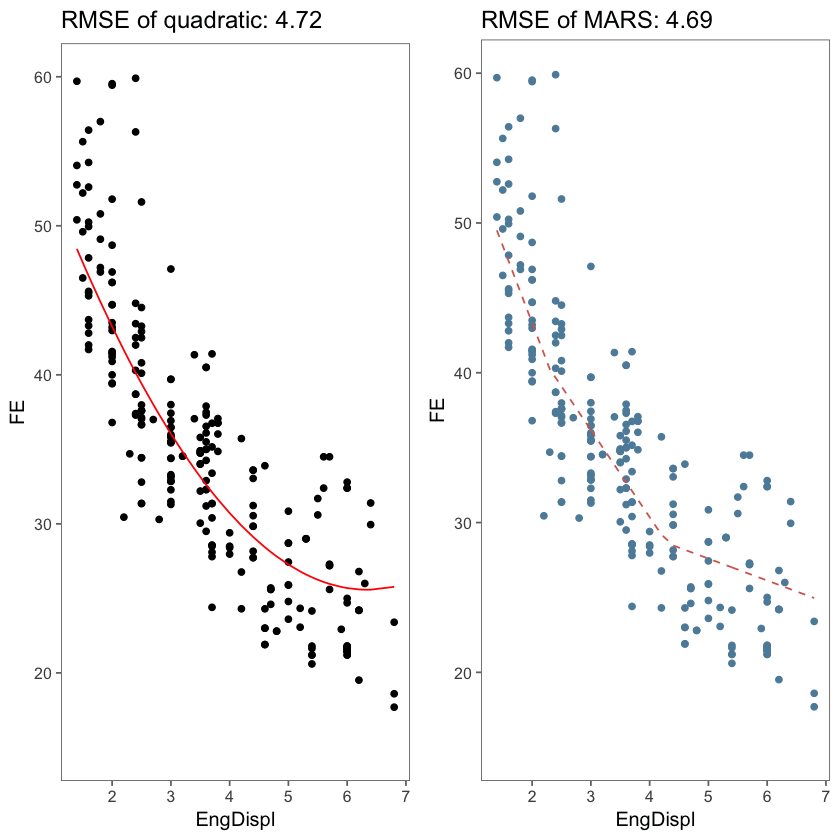

In [164]:
FE_quadratic <- predict(fit_quadratic,newdata = vld)
FE_MARS <- predict(fit_MARS,newdata = vld)

p7 <- ggplot(vld,aes(EngDispl,FE)) + geom_point() + scale_y_continuous(limits = c(15,60)) + theme_few() +
    geom_line(aes(EngDispl,FE_quadratic),colour="red") + 
    ggtitle(paste('RMSE of quadratic:',round(rmse(actual = vld$FE,predicted = FE_quadratic),2)))

p8 <- ggplot(vld,aes(EngDispl,FE)) + geom_point(colour="#5d8ca8") + scale_y_continuous(limits = c(15,60)) + theme_few() +
    geom_line(aes(EngDispl,FE_MARS),colour="#d5695d",linetype="dashed") + 
    ggtitle(paste('RMSE of MARS:', round(rmse(actual = vld$FE,predicted = FE_MARS),2)))

grid.arrange(p7, p8, ncol=2)